In [1]:
import glob
import gym
import os
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from ribs.archives import GridArchive
from ribs.visualize import grid_archive_heatmap
from tqdm import tqdm

In [2]:
def parse_method_name(archive_dir):

    enc = archive_dir.split('_')[0].split('-')

    if enc[0] == 'MAP':
        encoding_method = 'MAP-Elites'
    elif enc[0] =='AURORA':
        if enc[1] == 'PRE':
            if len(enc) == 4:
                encoding_method = enc[0] + '-' + enc[3] + ' Pretrained'
            elif len(enc) == 5:
                encoding_method = enc[0] + '-' + enc[3] + '-' + enc[4] + ' Pretrained'
            else:
                encoding_method = '-'.join(enc)
        elif enc[1] == 'INC':
            encoding_method = enc[0] + '-' + enc[3] + ' Incremental'
        else:
            encoding_method = '-'.join(enc)
    else:
        encoding_method = '-'.join(enc)

    return encoding_method

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2056/2056 [00:00<00:00, 26412.07it/s]


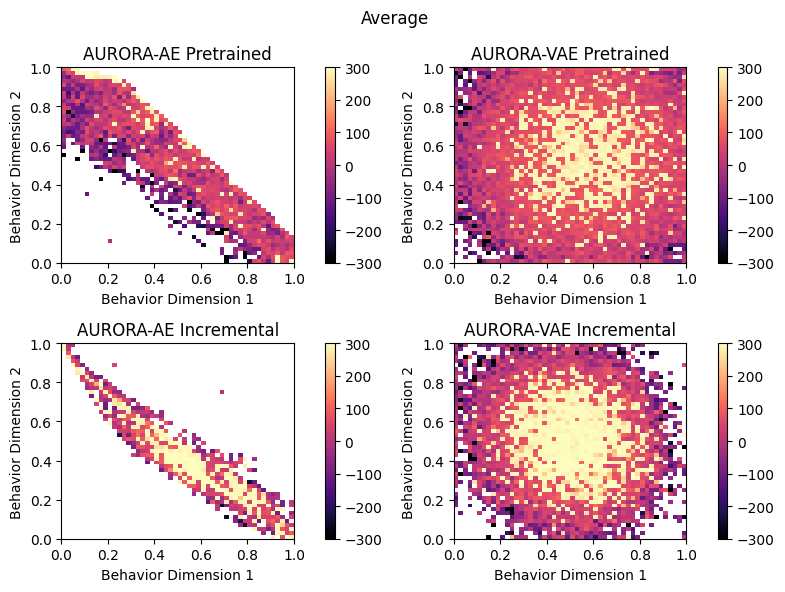

In [3]:
results_dir = '/home/andresf/workspace/CPSC-532J-NeverEndingRL/results/'

archive_dirs = ['AURORA-PRE-AVG-AE_LUNAR-LANDER_221126-195337',
                'AURORA-PRE-AVG-VAE_LUNAR-LANDER_221125-222616',
                'AURORA-INC-AVG-AE_LUNAR-LANDER_221126-175039',
                'AURORA-INC-AVG-VAE_LUNAR-LANDER_221125-123429']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(2 * 4, 2 * 3))

num_params = 4996

archive = GridArchive(dims=[50, 50], ranges=[(0.0, 1.0), (0.0, 1.0)])

archive.initialize(num_params)

for archive_idx, archive_dir in enumerate(archive_dirs):

    df = pd.read_pickle(os.path.join(results_dir, archive_dir, 'archive_1000.pkl'))

    solutions = df.loc[:, [f'solution_{idx}' for idx in range(num_params)]].to_numpy()
    objectives = df.loc[:, 'objective'].to_numpy()
    behaviors = df.loc[:, ['behavior_0', 'behavior_1']].to_numpy()

    archive.clear()

    for idx in tqdm(range(solutions.shape[0])):
        archive.add(solutions[idx], objectives[idx], behaviors[idx])

    grid_archive_heatmap(archive, vmin=-300, vmax=300, ax=axes[archive_idx // 2, archive_idx % 2])

    encoding_method = parse_method_name(archive_dir)

    axes[archive_idx // 2, archive_idx % 2].set_xlabel("Behavior Dimension 1")
    axes[archive_idx // 2, archive_idx % 2].set_ylabel("Behavior Dimension 2")
    axes[archive_idx // 2, archive_idx % 2].set_title(encoding_method)

fig.suptitle("Average")
fig.tight_layout()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2214/2214 [00:00<00:00, 21779.14it/s]


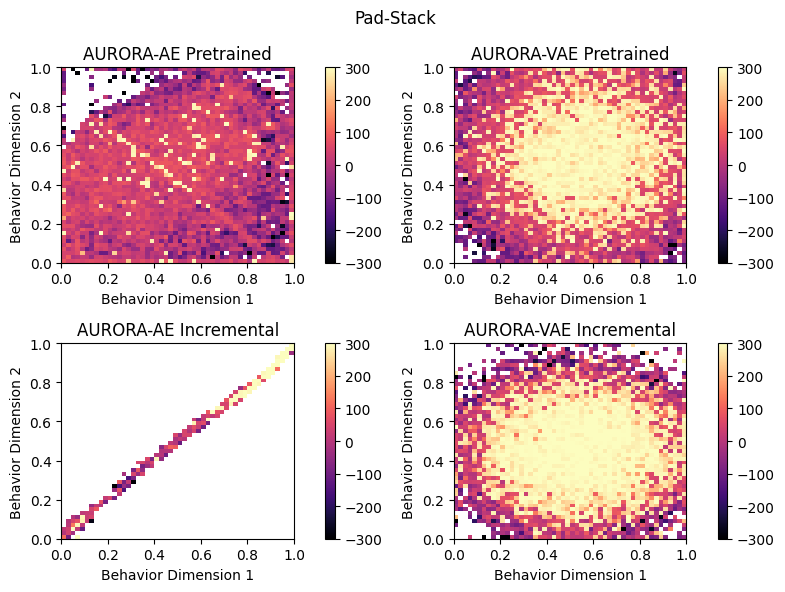

In [4]:
results_dir = '/home/andresf/workspace/CPSC-532J-NeverEndingRL/results/'

archive_dirs = ['AURORA-PRE-STACK-AE_LUNAR-LANDER_221128-113330',
                'AURORA-PRE-STACK-VAE_LUNAR-LANDER_221128-151753',
                'AURORA-INC-STACK-AE_LUNAR-LANDER_221128-131719',
                'AURORA-INC-STACK-VAE_LUNAR-LANDER_221128-182538']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(2 * 4, 2 * 3))

num_params = 4996

archive = GridArchive(dims=[50, 50], ranges=[(0.0, 1.0), (0.0, 1.0)])

archive.initialize(num_params)

for archive_idx, archive_dir in enumerate(archive_dirs):

    df = pd.read_pickle(os.path.join(results_dir, archive_dir, 'archive_1000.pkl'))

    solutions = df.loc[:, [f'solution_{idx}' for idx in range(num_params)]].to_numpy()
    objectives = df.loc[:, 'objective'].to_numpy()
    behaviors = df.loc[:, ['behavior_0', 'behavior_1']].to_numpy()

    archive.clear()

    for idx in tqdm(range(solutions.shape[0])):
        archive.add(solutions[idx], objectives[idx], behaviors[idx])

    grid_archive_heatmap(archive, vmin=-300, vmax=300, ax=axes[archive_idx // 2, archive_idx % 2])

    encoding_method = parse_method_name(archive_dir)

    axes[archive_idx // 2, archive_idx % 2].set_xlabel("Behavior Dimension 1")
    axes[archive_idx // 2, archive_idx % 2].set_ylabel("Behavior Dimension 2")
    axes[archive_idx // 2, archive_idx % 2].set_title(encoding_method)

fig.suptitle("Pad-Stack")
fig.tight_layout()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2189/2189 [00:00<00:00, 23121.65it/s]


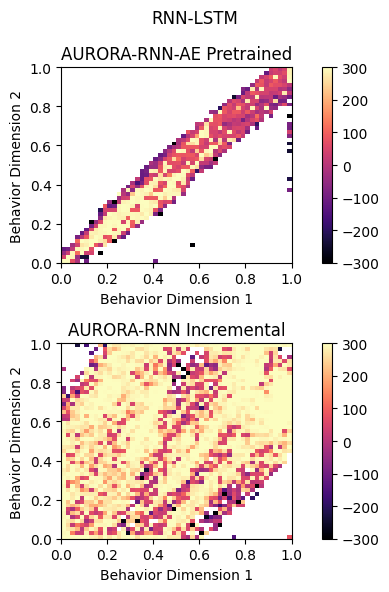

In [5]:
results_dir = '/home/andresf/workspace/CPSC-532J-NeverEndingRL/results/'

archive_dirs = ['AURORA-PRE-PAD-RNN-AE_LUNAR-LANDER_221130-022304',
                'AURORA-INC-PAD-RNN-AE_LUNAR-LANDER_221130-043215']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(1 * 4, 2 * 3))

num_params = 4996

archive = GridArchive(dims=[50, 50], ranges=[(0.0, 1.0), (0.0, 1.0)])

archive.initialize(num_params)

for archive_idx, archive_dir in enumerate(archive_dirs):

    df = pd.read_pickle(os.path.join(results_dir, archive_dir, 'archive_1000.pkl'))

    solutions = df.loc[:, [f'solution_{idx}' for idx in range(num_params)]].to_numpy()
    objectives = df.loc[:, 'objective'].to_numpy()
    behaviors = df.loc[:, ['behavior_0', 'behavior_1']].to_numpy()

    archive.clear()

    for idx in tqdm(range(solutions.shape[0])):
        archive.add(solutions[idx], objectives[idx], behaviors[idx])

    grid_archive_heatmap(archive, vmin=-300, vmax=300, ax=axes[archive_idx])

    encoding_method = parse_method_name(archive_dir)

    axes[archive_idx].set_xlabel("Behavior Dimension 1")
    axes[archive_idx].set_ylabel("Behavior Dimension 2")
    axes[archive_idx].set_title(encoding_method)

fig.suptitle("RNN-LSTM")
fig.tight_layout()

In [6]:
import sys

sys.path.append('/home/andresf/workspace/CPSC-532J-NeverEndingRL')
sys.path.append('/home/andresf/workspace/CPSC-532J-NeverEndingRL/project/code')

from project.code.lunar_lander_map_elites_complex_model import simulate

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:00<00:00, 20744.21it/s]


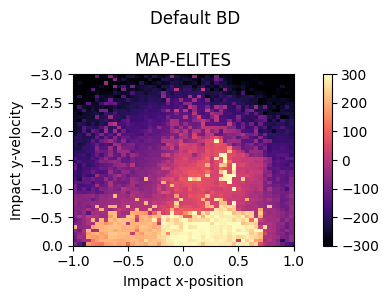

In [7]:
results_dir = '/home/andresf/workspace/CPSC-532J-NeverEndingRL/results/'

archive_dirs = ['MAP-ELITES_LUNAR-LANDER_221129-014701']

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(1 * 4, 1 * 3))

num_params = 4996

archive = GridArchive(dims=[50, 50], ranges=[(-1.0, 1.0), (-3.0, 0.0)])

archive.initialize(num_params)

env = gym.make("LunarLander-v2")

for archive_idx, archive_dir in enumerate(archive_dirs):

    df = pd.read_pickle(os.path.join(results_dir, archive_dir, 'archive_1000.pkl'))

    solutions = df.loc[:, [f'solution_{idx}' for idx in range(num_params)]].to_numpy()
    objectives = df.loc[:, 'objective'].to_numpy()
    behaviors = df.loc[:, ['behavior_0', 'behavior_1']].to_numpy()

    archive.clear()

    for idx in tqdm(range(solutions.shape[0])):
        archive.add(solutions[idx], objectives[idx], behaviors[idx])

    grid_archive_heatmap(archive, vmin=-300, vmax=300, ax=axis)

    encoding_method = parse_method_name(archive_dir)

    axis.invert_yaxis()
    axis.set_title(archive_dir.split('_')[0])
    axis.set_xlabel("Impact x-position")
    axis.set_ylabel("Impact y-velocity")

fig.suptitle("Default BD")
fig.tight_layout()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2056/2056 [02:17<00:00, 15.00it/s]


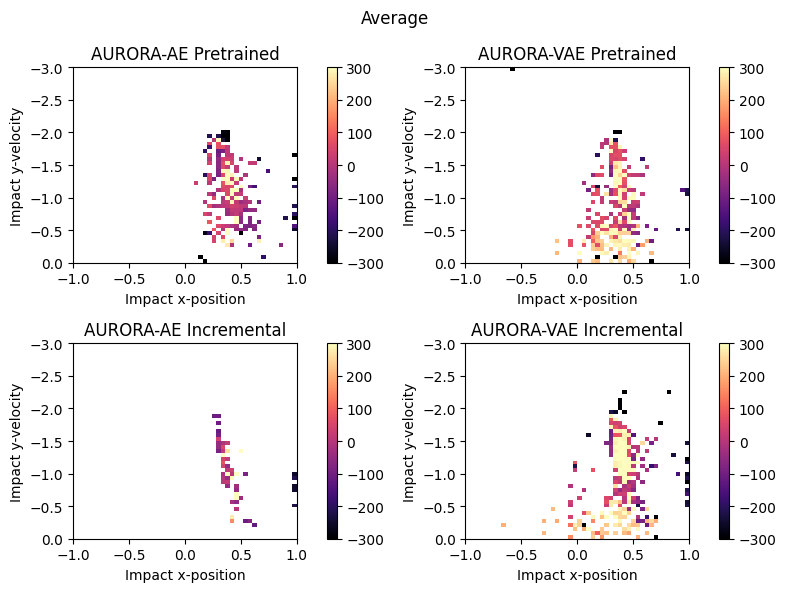

In [8]:
results_dir = '/home/andresf/workspace/CPSC-532J-NeverEndingRL/results/'

archive_dirs = ['AURORA-PRE-AVG-AE_LUNAR-LANDER_221126-195337',
                'AURORA-PRE-AVG-VAE_LUNAR-LANDER_221125-222616',
                'AURORA-INC-AVG-AE_LUNAR-LANDER_221126-175039',
                'AURORA-INC-AVG-VAE_LUNAR-LANDER_221125-123429']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(2 * 4, 2 * 3))

num_params = 4996

archive = GridArchive(dims=[50, 50], ranges=[(-1.0, 1.0), (-3.0, 0.0)])

archive.initialize(num_params)

env = gym.make("LunarLander-v2")

for archive_idx, archive_dir in enumerate(archive_dirs):

    df = pd.read_pickle(os.path.join(results_dir, archive_dir, 'archive_1000.pkl'))

    solutions = df.loc[:, [f'solution_{idx}' for idx in range(num_params)]].to_numpy()

    archive.clear()

    for solution in tqdm(solutions):
        obj, impact_x_pos, impact_y_vel, _ = simulate(env, solution, seed=0)
        archive.add(solution, obj, [impact_x_pos, impact_y_vel])

    grid_archive_heatmap(archive, vmin=-300, vmax=300, ax=axes[archive_idx // 2, archive_idx % 2])

    encoding_method = parse_method_name(archive_dir)

    axes[archive_idx // 2, archive_idx % 2].invert_yaxis()
    axes[archive_idx // 2, archive_idx % 2].set_title(encoding_method)
    axes[archive_idx // 2, archive_idx % 2].set_xlabel("Impact x-position")
    axes[archive_idx // 2, archive_idx % 2].set_ylabel("Impact y-velocity")

fig.suptitle("Average")
fig.tight_layout()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2214/2214 [05:30<00:00,  6.71it/s]


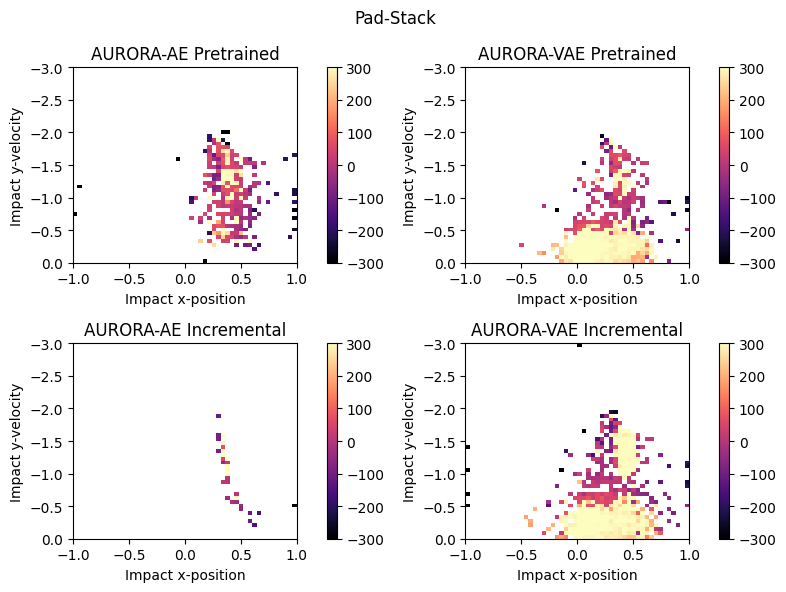

In [9]:
results_dir = '/home/andresf/workspace/CPSC-532J-NeverEndingRL/results/'

archive_dirs = ['AURORA-PRE-STACK-AE_LUNAR-LANDER_221128-113330',
                'AURORA-PRE-STACK-VAE_LUNAR-LANDER_221128-151753',
                'AURORA-INC-STACK-AE_LUNAR-LANDER_221128-131719',
                'AURORA-INC-STACK-VAE_LUNAR-LANDER_221128-182538']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(2 * 4, 2 * 3))

num_params = 4996

archive = GridArchive(dims=[50, 50], ranges=[(-1.0, 1.0), (-3.0, 0.0)])

archive.initialize(num_params)

env = gym.make("LunarLander-v2")

for archive_idx, archive_dir in enumerate(archive_dirs):

    df = pd.read_pickle(os.path.join(results_dir, archive_dir, 'archive_1000.pkl'))

    solutions = df.loc[:, [f'solution_{idx}' for idx in range(num_params)]].to_numpy()

    archive.clear()

    for solution in tqdm(solutions):
        obj, impact_x_pos, impact_y_vel, _ = simulate(env, solution, seed=0)
        archive.add(solution, obj, [impact_x_pos, impact_y_vel])

    grid_archive_heatmap(archive, vmin=-300, vmax=300, ax=axes[archive_idx // 2, archive_idx % 2])

    encoding_method = parse_method_name(archive_dir)

    axes[archive_idx // 2, archive_idx % 2].invert_yaxis()
    axes[archive_idx // 2, archive_idx % 2].set_title(encoding_method)
    axes[archive_idx // 2, archive_idx % 2].set_xlabel("Impact x-position")
    axes[archive_idx // 2, archive_idx % 2].set_ylabel("Impact y-velocity")

fig.suptitle("Pad-Stack")
fig.tight_layout()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2189/2189 [05:31<00:00,  6.61it/s]


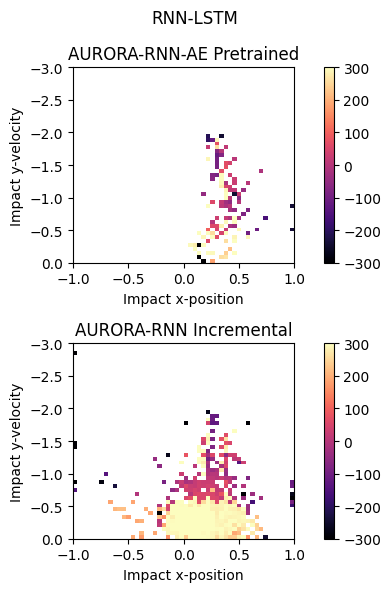

In [10]:
results_dir = '/home/andresf/workspace/CPSC-532J-NeverEndingRL/results/'

archive_dirs = ['AURORA-PRE-PAD-RNN-AE_LUNAR-LANDER_221130-022304',
                'AURORA-INC-PAD-RNN-AE_LUNAR-LANDER_221130-043215']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(1 * 4, 2 * 3))

num_params = 4996

archive = GridArchive(dims=[50, 50], ranges=[(-1.0, 1.0), (-3.0, 0.0)])

archive.initialize(num_params)

env = gym.make("LunarLander-v2")

for archive_idx, archive_dir in enumerate(archive_dirs):

    df = pd.read_pickle(os.path.join(results_dir, archive_dir, 'archive_1000.pkl'))

    solutions = df.loc[:, [f'solution_{idx}' for idx in range(num_params)]].to_numpy()

    archive.clear()

    for solution in tqdm(solutions):
        obj, impact_x_pos, impact_y_vel, _ = simulate(env, solution, seed=0)
        archive.add(solution, obj, [impact_x_pos, impact_y_vel])

    grid_archive_heatmap(archive, vmin=-300, vmax=300, ax=axes[archive_idx])

    encoding_method = parse_method_name(archive_dir)

    axes[archive_idx].invert_yaxis()
    axes[archive_idx].set_title(encoding_method)
    axes[archive_idx].set_xlabel("Impact x-position")
    axes[archive_idx].set_ylabel("Impact y-velocity")

fig.suptitle("RNN-LSTM")
fig.tight_layout()